In [8]:
import numpy as np
import matplotlib.pyplot as plt
import os
import struct
from vpython import *
import cv2

In [9]:
%load_ext autoreload
%autoreload 2
import HEAD_RECON

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
head = HEAD_RECON.threeD_head.read_from_file(1,5)

In [ ]:
head.center()
head.create_vpython_spheres()
head.save()

In [ ]:
plt.imshow(head.twoD_image)
plt.show()

In [ ]:

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

ax.scatter(head.xyz[:,0], -head.xyz[:,2], -head.xyz[:,1], c=head.rgb)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()


In [ ]:
for i in range(1,16):
    head1 = HEAD_RECON.threeD_head.read_from_file(1,5)
    head1.full_filter()
    head1.create_vpython_spheres()
    head1.save()

In [ ]:
img1,path1 = head1.get_filtered_image()

In [10]:
head1 = HEAD_RECON.threeD_head.read_from_file(1,7)
head2 = HEAD_RECON.threeD_head.read_from_file(1,8)

In [27]:
head1 = HEAD_RECON.threeD_head.load_from_pickle(1,1)
head2 = HEAD_RECON.threeD_head.load_from_pickle(1,2)


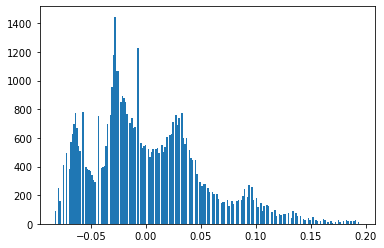

In [28]:
plt.hist(head2.xyz[:,2], bins=200)
plt.show()

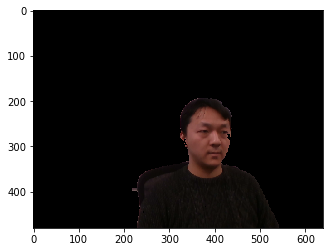

In [29]:
img1,path1 = head2.get_filtered_image()
plt.imshow(img1)

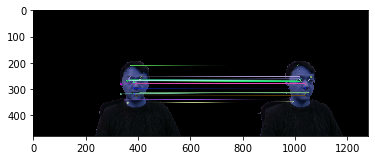

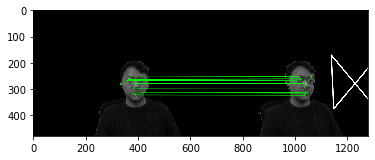

[[-0.05353813 -0.17600916 -0.02038162]
 [-0.04404113 -0.18751116 -0.02338162]
 [-0.04062113 -0.17768516 -0.02138162]
 [-0.03801813 -0.20061916 -0.02838162]
 [-0.02965313 -0.18436016 -0.02538162]
 [-0.02965313 -0.18436016 -0.02538162]
 [-0.02350313 -0.10226816 -0.02838162]
 [-0.01191613 -0.13077616 -0.03938162]
 [-0.00638413 -0.09488316 -0.03338162]
 [-0.00553613 -0.15788416 -0.03938162]
 [-0.00553613 -0.15788416 -0.03938162]
 [-0.00118213 -0.08482316 -0.03038162]
 [ 0.00190387 -0.09461216 -0.03138162]
 [ 0.02357487 -0.10201316 -0.02638162]
 [ 0.02326787 -0.18127116 -0.02838162]
 [ 0.03100887 -0.19906816 -0.03038162]]
[[-0.01420569 -0.17659403 -0.02294001]
 [ 0.00121931 -0.18656903 -0.02994001]
 [ 0.00303731 -0.17684403 -0.02794001]
 [ 0.00592331 -0.19943003 -0.03094001]
 [ 0.01268531 -0.18327303 -0.02794001]
 [ 0.01268531 -0.18327303 -0.02794001]
 [ 0.01566231 -0.10154403 -0.02994001]
 [ 0.03249031 -0.12781103 -0.03594001]
 [ 0.03317631 -0.09365603 -0.03094001]
 [ 0.03525831 -0.1567260

In [39]:
import multi_head

heads = multi_head.MultiHead.joined_heads(head1, head2)

In [40]:
print(head1.center_pos)
print(head2.center_pos)

[-9.42374482e-19 -1.00691125e-16 -5.11839450e-16]
[-1.72560746e-18 -5.53599327e-17  6.29972740e-17]


In [59]:
A=head1.xyz
B=head2.xyz

A.shape
filter =np.random.choice(np.arange(A.shape[0]),20)
A=A[filter]
from sklearn.neighbors import NearestNeighbors
NearestNeighbors(A.T, B.T)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None,
                 n_neighbors=array([[ 0.02810687,  0.00839587,  0.16342287,  0.07528787, -0.16578213,
         0.12215287, -0.20081713,  0.02225587, -0.07947913, -0.04849613,
         0.01976387, -0.22619713,  0.04745987,  0.23432787,  0.19649587,
        -0.02634113, -0.09519113, -0.08574213, -0.01836413,  0.03511087],
       [-0...
        -0.06138162,  0.00061838, -0.02838162, -0.00638162, -0.02138162,
         0.02461838,  0.04861838, -0.04938162, -0.06738162,  0.02661838]]),
                 p=2,
                 radius=array([[-0.04827324, -0.04653134, -0.0461922 , ...,  0.27637463,
         0.27922059,  0.28207246],
       [-0.30455608, -0.30463766, -0.30367615, ...,  0.17961492,
         0.18025286,  0.18088951],
       [ 0.06764277,  0.06732256,  0.05493934, ..., -0.00370364,
        -0.00215475, -0.00060697]]))

In [ ]:
img1,path1 = head1.get_filtered_image()
img2,path2 = head2.get_filtered_image()

In [ ]:
plt.imshow(head1.twoD_image)

In [ ]:
# test
kp1, des1 = HEAD_RECON.estimate_frame_transform.get_descriptors(path1)
kp2, des2 = HEAD_RECON.estimate_frame_transform.get_descriptors(path2)
good_without_list = HEAD_RECON.estimate_frame_transform.get_matched_points(path1,kp1,des1,path2,kp2,des2,0.8)


In [ ]:
cleaned_match = HEAD_RECON.estimate_frame_transform.clean_matches(kp1,path1,kp2,path2,good_without_list)

In [ ]:
import multi_head

heads = multi_head.MultiHead.joined_heads(head1, head2)

print(head1.center_pos)
print(head2.center_pos)

In [ ]:
%matplotlib inline

test_img= (head1.twoD_image.copy())
plt.imshow(test_img)
plt.scatter(xy1[:,0],xy1[:,1])
plt.show()


In [ ]:
%matplotlib inline
test_img= (head2.twoD_image.copy())
plt.imshow(test_img)
plt.scatter(xy2[:,0],xy2[:,1],c='g')
plt.show()


In [ ]:
from Procustes import *
A = head1.xyz_unfiltered[xyindex1][1:]
B = head2.xyz_unfiltered[xyindex2][1:]
print('----\n',A)
print('----\n',B)

c, R, t = umeyama(A, B)    
print ('c', c)
print ('R', R)
print ('t', t)

print('-------')
print('-------')
print('-------')
print(B.dot(c*R)+t)
print('-------')
print(A)

In [ ]:
d, Z, tform= procrustes(A, B, scaling=True, reflection='best')

R,c,t = tform['rotation'], tform['scale'], tform['translation']


print ("Check:  B*cR + t = A  is", np.allclose(B.dot(c*R) + t, A))
err = ((B.dot(c * R) + t - A) ** 2).sum()
print ("Residual error", err)

B.dot(c*R) + t

In [ ]:
dst_pts

In [ ]:
from Procrustes2 import *
A = np.array([
  [0, 0, -1],
  [0, 0, 0],
  [0, 0, 1],
  [0, 1, 0],
  [0, 1, 0],
  [1, 0, 0],
])

B = np.array([
  [0, 0, 1],
  [0, 0, 0],
  [0, 0, -1],
  [0, 1, 0],
  [0, 1, 0],
  [-1, 0, 0],
])

In [ ]:
d, Z, tform= procrustes(A, B, scaling=True, reflection='best')

R,c,t = tform['rotation'], tform['scale'], tform['translation']



print ("Check:  B*cR + t = A  is", np.allclose(B.dot(c*R) + t, a1))
err = ((B.dot(c * R) + t - A) ** 2).sum()
print ("Residual error", err)

In [ ]:
R

In [ ]:
from Procrustes2